In [3]:
import pandas as pd
import numpy as np
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from spacy import displacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import mean_squared_error, confusion_matrix, log_loss, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier


from wordcloud import WordCloud

In [4]:
''' Read in the Data '''

df = pd.read_csv('mbti-type/mbti_1.csv')
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
# from spacy.lang.en import English
# nlp = English()

In [6]:
''' Create a Personality List for Referencing Sorting Processes'''

personality_list = np.sort(['INTP', 'INTJ', 'INFP', 'INFJ', 'ISTP', 'ISTJ', 'ISFP', 'ISFJ',
                   'ENTP', 'ENTJ', 'ENFP', 'ENFJ', 'ESTP', 'ESTJ', 'ESFP', 'ESFJ'])

''' lower personality list for use in cleaning strings '''
personality_list_low = []
for i in personality_list:
    personality_list_low.append(i.lower())
    personality_list_low.append(i.lower() + 's')
    
''' add personality list to stopwords '''
for w in personality_list_low:
    nlp.vocab[w].is_stop = True
    

In [7]:
''' Add Additional Words from NLTK to Stoplist '''
import nltk
from nltk.corpus import words
nltk.download('words')
word_list = words.words()
word_list = set(word_list)

[nltk_data] Downloading package words to
[nltk_data]     /home/neoresme222/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [8]:
''' Determine Preliminary Information on Personality Distribution'''

' Determine Preliminary Information on Personality Distribution'

In [9]:
def binary_character(string,index_num,character_val):
    '''
    take a Myers-Briggs personality identifier and return a boolean value for specified characteristic in terms of 1 or 0
    
    input: type string, 4 char
    output: 1 for specified characteristic is True
            0 otherwise  
    '''
    if list(string)[index_num] == character_val:
        return 1
    else:
        return 0

In [10]:
''' Create Columns in Dataframe for Each Binary Personality Subcategory'''

personality_characteristics = ['introvert', 'sensing', 'thinking', 'perceiving']
personality_identifiers = ['I','S','T','P']

for number in range(4):
    df[personality_characteristics[number]] = df['type'].apply(lambda x: binary_character(x,number,personality_identifiers[number]))

In [11]:
''' Find Counts and Proportions for the 16 Personality Types '''

MB_personality_counts = {}
MB_personality_proportions = {}
for i in personality_list:
    MB_personality_counts[i] = (sum(df['type'] == i))
    MB_personality_proportions[i] = (sum(df['type'] == i)/8675)
    print('the count of {} is {}'.format(i,sum(df['type'] == i)),'the proportion is: {}'.format(sum(df['type'] == i)/8675))

the count of ENFJ is 190 the proportion is: 0.02190201729106628
the count of ENFP is 675 the proportion is: 0.07780979827089338
the count of ENTJ is 231 the proportion is: 0.026628242074927953
the count of ENTP is 685 the proportion is: 0.07896253602305475
the count of ESFJ is 42 the proportion is: 0.00484149855907781
the count of ESFP is 48 the proportion is: 0.00553314121037464
the count of ESTJ is 39 the proportion is: 0.004495677233429395
the count of ESTP is 89 the proportion is: 0.01025936599423631
the count of INFJ is 1470 the proportion is: 0.16945244956772335
the count of INFP is 1832 the proportion is: 0.21118155619596543
the count of INTJ is 1091 the proportion is: 0.12576368876080693
the count of INTP is 1304 the proportion is: 0.15031700288184438
the count of ISFJ is 166 the proportion is: 0.01913544668587896
the count of ISFP is 271 the proportion is: 0.031239193083573487
the count of ISTJ is 205 the proportion is: 0.02363112391930836
the count of ISTP is 337 the proporti

In [12]:
''' Find Counts and Proportions for the 4 Binary Characteristics '''

MB_characteristic_counts = {}
MB_characteristic_proportions = {}
for i in personality_characteristics:
    MB_characteristic_counts[i] = sum(df[i])
    MB_characteristic_proportions[i] = (sum(df[i])/8675)
    print('the count of {} is {}'.format(i,sum(df[i])), 'the proportion is: {}'.format(sum(df[i])/8675))

the count of introvert is 6676 the proportion is: 0.7695677233429394
the count of sensing is 1197 the proportion is: 0.13798270893371758
the count of thinking is 3981 the proportion is: 0.4589048991354467
the count of perceiving is 5241 the proportion is: 0.604149855907781


(0, 1)

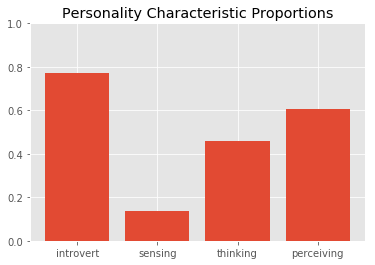

In [13]:
plt.bar(range(len(MB_characteristic_proportions)), list(MB_characteristic_proportions.values()), align = 'center')
plt.title('Personality Characteristic Proportions')
plt.xticks(range(len(MB_characteristic_proportions)), list(MB_characteristic_proportions.keys()))
plt.ylim(0,1)

In [14]:
pop_personality_est_dict = {'ISFJ': 13.8,'ESFJ': 12.3,'ISTJ': 11.6,'ISFP': 8.8,'ESTJ': 8.7,
                            'ESFP': 8.5,'ENFP': 8.1,'ISTP': 5.4,'INFP': 4.4,'ESTP': 4.3,'INTP': 3.3,
                            'ENTP': 3.2,'ENFJ': 2.5,'INTJ': 2.1,'ENTJ': 1.8,'INFJ': 1.5}

pop_sort = sorted(pop_personality_est_dict.keys())

MB_global_est_pers = {}
for item in pop_sort:
    MB_global_est_pers[item] = pop_personality_est_dict.get(item)

In [15]:
''' Make Infographics of Basic Data '''

' Make Infographics of Basic Data '

In [302]:
colors = ['yellow','brown','blue','orange','grey','pink','orange','purple', ]
# colors1 = ['orange', 'brown', 'blue', 'pink', 'grey', 'green', 'purple', 'red']
colors2 = ['orange', 'brown', 'blue', 'pink', 'orange', 'brown', 'blue', 'pink', 'grey', 'green', 'purple', 'red', 'black']
colors3 = ['yellow','brown','blue','orange','yellow','brown','blue','orange','grey','pink','orange','purple', 'black']

AttributeError: 'tuple' object has no attribute 'show'

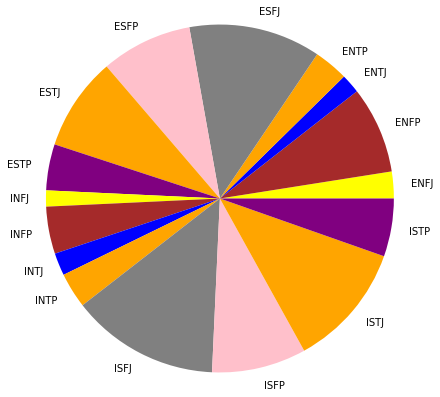

In [301]:
plt.pie(MB_global_est_pers.values(), labels = MB_global_est_pers.keys(), radius = 2, colors = colors).show

In [18]:
other = 0.00484149855907781 + 0.00553314121037464 + 0.004495677233429395 + 0.01025936599423631

MB_pp_plot_special = {'ENFJ': 0.02190201729106628,
 'ENFP': 0.07780979827089338,
 'ENTJ': 0.026628242074927953,
 'ENTP': 0.07896253602305475,
 'INFJ': 0.16945244956772335,
 'INFP': 0.21118155619596543,
 'INTJ': 0.12576368876080693,
 'INTP': 0.15031700288184438,
 'ISFJ': 0.01913544668587896,
 'ISFP': 0.031239193083573487,
 'ISTJ': 0.02363112391930836,
 'ISTP': 0.03884726224783862,
    'ES--': other}

AttributeError: 'tuple' object has no attribute 'show'

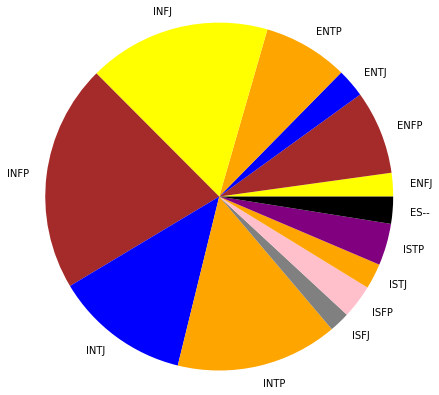

In [303]:
plt.pie(MB_pp_plot_special.values(), labels= MB_pp_plot_special.keys(), radius = 2, colors = colors3).show

In [20]:
''' Process the Text '''

' Process the Text '

In [21]:
from nltk.corpus import stopwords
stop_list = set(stopwords.words('english'))

In [22]:
def preprocess_tokens(string, word_list, stop_list):
    ''' Remove all unwanted identifiers from a string.
    input: dirty string, word_list (a list of all words in English language)
    output: clean string (punctuation, spacing, numbers, stopwords, urls removed)
    '''
    string = string.replace('|||', ' ')
    cleaned = string.lower().split()
#     cleaned = [token.lemma_ for token in doc if not token.is_stop]
#     cleaned = [token.lemma_ for token in doc if not token.is_punct | token.is_space | 
#                token.like_num | token.is_stop | token.like_url |
#                (not (token.text in nlp.vocab))]
    '''make sure every string in cleaned is is word list '''
    scrubbed = [item for item in cleaned if (item in word_list) and (item not in stop_list)]
#     for item in cleaned:
#         if item in word_list:
#             scrubbed.append(item)
    return " ".join(scrubbed)

In [23]:
df['posts2'] = df['posts'].apply(lambda x: preprocess_tokens(x, word_list, stop_list))

In [24]:
df.to_csv('data/processed_posts')

In [25]:
'''Create Corpus and Vectorize the Tokens'''

corpus = df['posts2']
vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus)
X = vectorizer.fit_transform(corpus.values.astype('U'))
X = X.todense()

In [26]:
''' Create Naive Bayes Models '''

' Create Naive Bayes Models '

In [27]:
''' Create Numerical Identifier Column in Dataframe for the 16 Personality Types for Use in Multinomial Naive Bayes'''

personality_dict = {}
for index, value in enumerate(personality_list):
    personality_dict[index] = value

def find_personality_num(classifier):
    for key,value in personality_dict.items():
        if classifier == value:
            return key
        
df['num_type'] = df['type'].apply(find_personality_num)

In [90]:
Multi_y = df['num_type']
Multi_X_train, Multi_X_test, Multi_y_train, Multi_y_test = train_test_split(X, Multi_y, random_state=1723, stratify=Multi_y, test_size = 0.3)

'''Run Multinomial Naive Bayes for 16 personality types'''

Multinomial = MultinomialNB() 
Multinomial.fit(Multi_X_train, Multi_y_train)
print('Multinomial Naive Bayes Model Score: {}'.format(Multinomial.score(Multi_X_test,Multi_y_test)))

Multinomial Naive Bayes Model Score: 0.21129466000768343


In [91]:
''' Split the Training Data from the Test Data For Bernoulli Naive Bayes and Random Forest Classifier'''



' Split the Training Data from the Test Data For Bernoulli Naive Bayes and Random Forest Classifier'

In [31]:
''' Run Bernoulli Naive Bayes for Each Binomial Personality Characteristic '''

def Bernoulli_score(Bern_X_train, Bern_X_test, Bern_y_train, Bern_y_test, instance):
    ''' 
    input: X_train, y_train, X_test, y_tet data
    output: Bernoulli model, Bernoulli score
    '''
    Bernoulli = BernoulliNB() 
    Bernoulli.fit(Bern_X_train, Bern_y_train)
    Bern_predict = Bernoulli.predict(Bern_X_test)
    print('the Bernoulli score for {} is: {}'.format(instance, Bernoulli.score(Bern_X_test,Bern_y_test)))
    return Bernoulli, Bern_predict

In [32]:
''' Print out Bernoulli Scores for each Personality Characteristic and Create a Dictionary '''

BNB_model_dict = {}
BNB_y_dict = {}
BNB_predict_dict = {}
for instance in personality_characteristics:
    Bern_y = df[instance]
    X_train, X_test, y_train, y_test = train_test_split(X, Bern_y, random_state=1723, stratify=Bern_y, test_size = 0.3)
    Bern,Bern_predict = Bernoulli_score(X_train, X_test, y_train, y_test,instance)
    BNB_model_dict[instance] = Bern
    BNB_y_dict[instance] = y_test
    BNB_predict_dict[instance] = Bern_predict

the Bernoulli score for introvert is: 0.7698809066461775
the Bernoulli score for sensing is: 0.8605455243949289
the Bernoulli score for thinking is: 0.7537456780637726
the Bernoulli score for perceiving is: 0.6304264310411064


In [94]:
''' Create Random Forest Classifier Models '''

' Create Random Forest Classifier Models '

In [95]:
'''Run Random Forest Classifier for 16 personality types'''

rf = RandomForestClassifier(n_estimators=100,
                           max_features='auto',
                           random_state=0, n_jobs=-1)

rf.fit(Multi_X_train, Multi_y_train)
                                     
# Test Prediction
pred = rf.predict(Multi_X_test)
RFC_16_logg_loss = log_loss(Multi_y_test, rf.predict_proba(Multi_X_test))
RFC_16_score = rf.score(Multi_X_test, Multi_y_test)
print("log loss =", RFC_16_logg_loss)
print(f"accuracy =", RFC_16_score)

log loss = 2.953076500962901
accuracy = 0.26930464848252017


In [35]:
def RFC_model(X_train, X_test, y_train, y_test, instance):
    '''
    input: training and testing sets
    output: print log loss and score,
            return: Random Forest model, y predictions
    '''
    rf = RandomForestClassifier(n_estimators=100,
                           max_features='auto',
                           random_state=0, n_jobs=-1)
    rf.fit(X_train, y_train)
    print(f"log loss for {instance} = {log_loss(y_test, rf.predict_proba(X_test))}")
    print(f"accuracy of {instance} = {rf.score(X_test, y_test)}")
    return rf, rf.predict(X_test)

In [36]:
RF_model_dict = {}
RF_y_test_dict = {}
RF_y_predict_dict = {}
for instance in personality_characteristics:
    RF_y = df[instance]
    X_train, X_test, y_train, y_test = train_test_split(X, RF_y, random_state=1723, stratify=RF_y, test_size = 0.3)
    RF_model, RF_y_predict = RFC_model(X_train, X_test, y_train, y_test, instance)
    RF_model_dict[instance]  = RF_model
    RF_y_test_dict[instance] = y_test
    RF_y_predict_dict[instance] = RF_y_predict

log loss for introvert = 0.5300627687688219
accuracy of introvert = 0.7694967345370726
log loss for sensing = 0.39914642631262115
accuracy of sensing = 0.8620822128313484
log loss for thinking = 0.6105265075521596
accuracy of thinking = 0.6980407222435652
log loss for perceiving = 0.6596894595319925
accuracy of perceiving = 0.6073761044948137


In [102]:
'''Gradient Boosted Random Forest Classifier '''

def Grad_Boost_model(X_train, X_test, y_train, y_test, instance):
    '''
    input: training and testing sets
    output: print score,
            return: gradient boosted model, y predictions
    '''
    gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5,
                                max_depth=1, random_state=0, n_jobs=-1)
    gb.fit(X_train, y_train)
    print('the GB score for {} is:'.format(instance),gb.score(X_test, y_test))
    return gb, gb.predict(X_test)

In [100]:
GB_model_dict = {}
GB_y_test_dict = {}
GB_y_predict_dict = {}
for instance in personality_characteristics:
    GB_y = df[instance]
    X_train, X_test, y_train, y_test = train_test_split(X, GB_y, random_state=1723, stratify=GB_y, test_size = 0.3)
    GB_model, GB_y_predict = Grad_Boost_model(X_train, X_test, y_train, y_test, instance)
    GB_model_dict[instance] = GB_model
    GB_y_test_dict[instance] = y_test
    GB_y_predict_dict[instance] = GB_y_predict

the GB score for introvert is: 0.749135612754514
the GB score for sensing is: 0.8109873223203995
the GB score for thinking is: 0.7318478678447945
the GB score for perceiving is: 0.6154437187860161


In [103]:
''' Impliment Confusion Matrixes '''

# y_true = df['introvert']
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)

# tn, fp, fn, tp

array([[  79,  951],
       [  71, 1502]])

In [ ]:
BNB_model_dict = {}
BNB_y_dict = {}
BNB_predict_dict = {}

In [283]:
A_y_test = list(zip(BNB_y_dict['introvert'],BNB_y_dict['sensing']))
B_y_test = list(zip(BNB_y_dict['thinking'],BNB_y_dict['perceiving']))

C_y_test = []
for i in range(len(A_y_test)):
    C_y_test.append(A_y_test[i] + B_y_test[i])



In [289]:
A_y_pred = list(zip(BNB_predict_dict['introvert'],BNB_predict_dict['sensing']))
B_y_pred = list(zip(BNB_predict_dict['thinking'],BNB_predict_dict['perceiving']))

C_y_pred = []
for i in range(len(A_y_test)):
    C_y_pred.append(A_y_pred[i] + B_y_pred[i])

In [294]:
BNB_rate_list = []
for i in range(len(C_y_test)):
    BNB_rate_list.append(C_y_test[0] == C_y_pred[0])

In [298]:
sum(np.array(BNB_rate_list).astype(int))

0

In [291]:
print(C_y_test[0]) 
print(C_y_pred[0])

(1, 0, 0, 1)
(1, 0, 1, 0)


In [ ]:
df_BNB = pd.DataFrame({})

In [104]:
''' Determine Feature Importances and Return Most Used Words '''

' Determine Feature Importances and Return Most Used Words '

In [45]:
df_feat.shape

(25415, 4)

In [37]:
feature_names = vectorizer.get_feature_names()
df_feat = pd.DataFrame({ 'feature names': feature_names}) 

for instance in personality_characteristics:
    df_feat['fi {}'.format(instance)] = RF_model_dict[instance].feature_importances_
#     df_feat = df_feat.sort_values(by='feature importances {}'.format(instance), ascending = False)

In [38]:
df_feat.set_index('feature names', inplace = True)

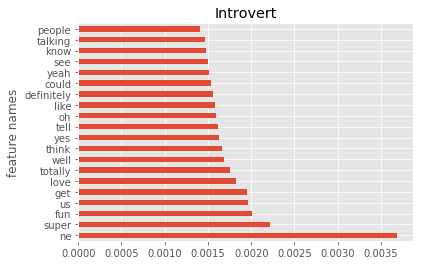

In [178]:
df_feat['fi introvert'].nlargest(20).plot(kind='barh', title = 'Introvert')


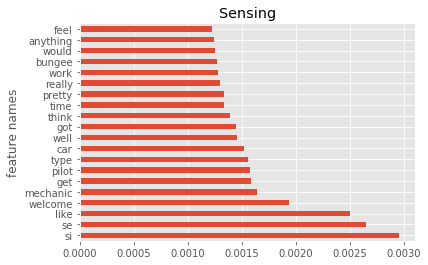

In [179]:
df_feat['fi sensing'].nlargest(20).plot(kind='barh', title = 'Sensing')

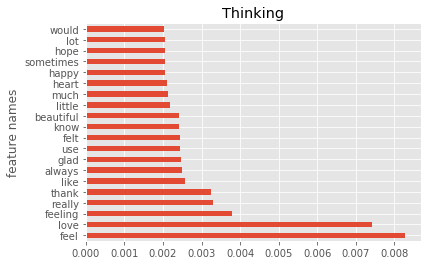

In [180]:
df_feat['fi thinking'].nlargest(20).plot(kind='barh', title = 'Thinking')

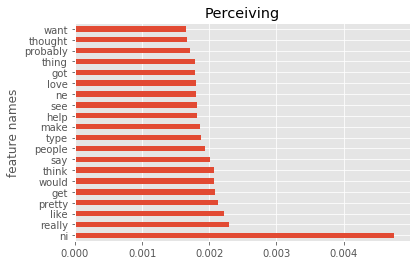

In [181]:
df_feat['fi perceiving'].nlargest(20).plot(kind='barh', title = 'Perceiving')

In [ ]:
cmi = 0
# def MakeCF():
#     global cmi
#     CM = [mpl.cm.Greens, mpl.cm.Oranges, mpl.cm.Blues][cmi % 3]
#     cmi += 1
#     def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#         return tuple(int(255 * j) for j in CM(np.random.rand() + .4))
#     return color_func
     
# #%% Create wordclouds
# fontPath = 'C:\\Windows\\Fonts\\SpecialElite.ttf'
# for i, Ai in enumerate(A):
#     icon = Image.open(os.path.join('Masks', Ai + '.png'))
#     mask = Image.new("RGB", icon.size, (255, 255, 255))
#     mask.paste(icon, icon)
#     mask = np.array(mask)
#     wc = WordCloud(background_color = None, color_func = MakeCF(), 
#          font_path = fontPath, mask = mask, max_font_size = 250, mode = 'RGBA')            
#     wc.generate_from_frequencies(AW[i])
# #     wc.to_file(os.path.join('Wordclouds', Ai + '.png'))

In [57]:
''' Create WordClouds for Personality Characteristics '''

# def plot_wordcloud(indict, bk_color = 'white', figname='wordcloud', rgb=(0,0,0)):
                   
#     font_path = None #"/Library/Fonts/DIN Condensed Bold.ttf"
#     wc = WordCloud(background_color= bk_color,max_words=25,
#                    collocations=False, font_path = font_path, scale=5)
# #     wc.generate(text) 
#     for i,v in indict.items():
#         wc.generate_from_frequencies(indict[i])
#     fig, ax = plt.subplots(figsize=(14,18))
#     plt.imshow(wc)
# #     plt.savefig(‘data/wordclouds/{}’.format(figname), dpi=240)
# # color_func=lambda *args, **kwargs: rgb

In [85]:
def wordcloud_from_dict(indict):
    wc = WordCloud(background_color= 'white',max_words=25, color_func = random_color_func,
                   collocations=False, font_path = None, scale=5)
    wc.generate_from_frequencies(indict)
    fig, ax = plt.subplots(figsize=(14,18))
    plt.imshow(wc)
    plt.xticks([])
    plt.yticks([])

In [86]:
# def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
#     h = int(360.0 * 21.0 / 255.0)
#     s = int(100.0 * 255.0 / 255.0)
#     l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

#     return "hsl({}, {}%, {}%)".format(h, s, l)

In [173]:
# def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
#     h = int(360.0 * 10.0 / 255.0)
#     s = int(100.0 * 255.0 / 255.0)
#     l = int(100.0 * float(random_state.randint(40, 120)) / 255.0)

#     return "hsl({}, {}%, {}%)".format(h, s, l)

In [174]:
# personality_full_text_dict = {}
# for instance in list(personality_list):
#     full_text = ' '.join(df[df['type'] == instance]['posts2'])
#     personality_full_text_dict[instance] = full_text

In [235]:
fi_i = df_feat['fi introvert'].nlargest(20).to_dict()
fi_s = df_feat['fi sensing'].nlargest(20).to_dict()
fi_t = df_feat['fi thinking'].nlargest(20).to_dict()
fi_p = df_feat['fi perceiving'].nlargest(20).to_dict()

list_of_vec_word_dict = [fi_i,fi_s,fi_t,fi_p]

In [244]:
remove_words = ['si', 'se', 'ni', 'ne']
fi_t = fi_t.copy()
for i in fi_t.keys():
    if i in remove_words:
        del fi_t[i]

In [252]:
def remove_words_from_dict(dict_1):
    dict_2 = dict_1.copy()
    for i in dict_1.keys():
        if i in remove_words:
            del dict_2[i]
    return dict_2

In [253]:
for thing in list_of_vec_word_dict:
    remove_words_from_dict(thing)

In [245]:
# for i in list_of_vec_word_dict:
#     print(len(i))

20
20
20
20


In [246]:
fi_t

{'feel': 0.008271989330408465,
 'love': 0.007420359409915546,
 'feeling': 0.003790660180523019,
 'really': 0.0032907547400953157,
 'thank': 0.0032446773519413737,
 'like': 0.0025792120137215903,
 'always': 0.0024815964649327047,
 'glad': 0.0024556595263199375,
 'use': 0.0024452004354563904,
 'felt': 0.0024344657823230412,
 'know': 0.002421788494769318,
 'beautiful': 0.002416748324060898,
 'little': 0.002178362625741731,
 'much': 0.0021262301485075797,
 'heart': 0.0021076970294894755,
 'happy': 0.0020568252945733605,
 'sometimes': 0.0020528999997908143,
 'hope': 0.0020472477050081307,
 'lot': 0.002039666494542327,
 'would': 0.002022574005376787}

In [260]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 35.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(35, 130)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

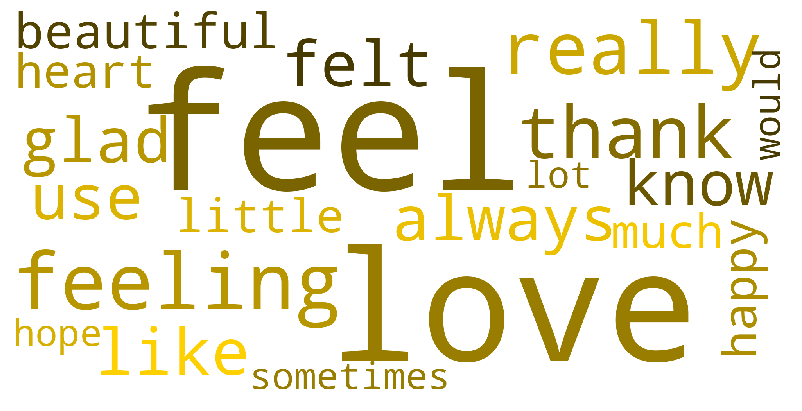

In [261]:
wordcloud_from_dict(fi_t)

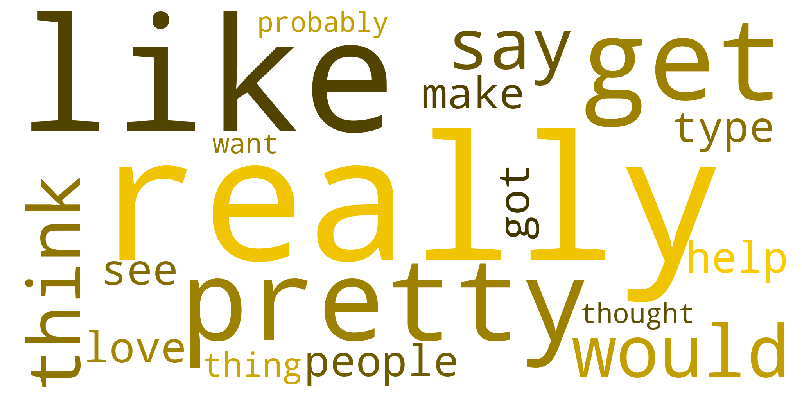

In [262]:
wordcloud_from_dict(fi_p)

In [ ]:
wordcloud_from_dict(fi_s)

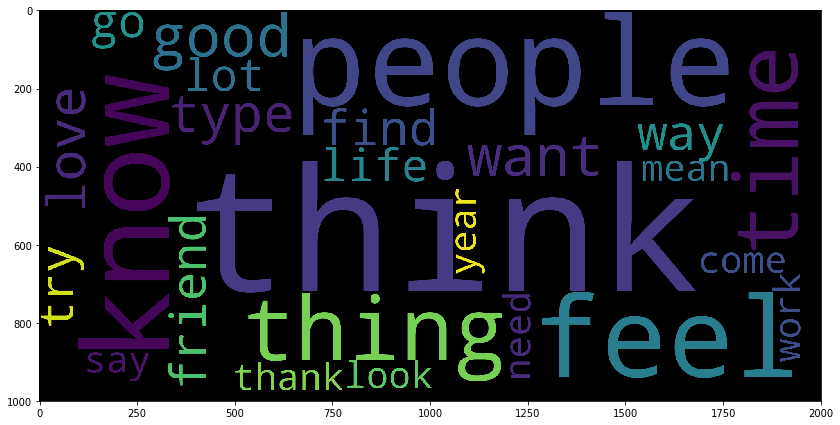

In [266]:
ENFJ_full_text = ' '.join(df[df['type'] == 'ENFJ']['posts2'])
plot_wordcloud(introvert_full_text, 'black')

In [280]:
introvert_full_text = ' '.join(df[df['type'].isin(['INFJ', 'INTJ', 'INFP', 'INFP','ISFJ', 'ISTJ', 'ISFP', 'ISFP'])]['posts2'])
plot_wordcloud(ISTP_full_text, 'black')

TypeError: sequence item 2091: expected str instance, float found

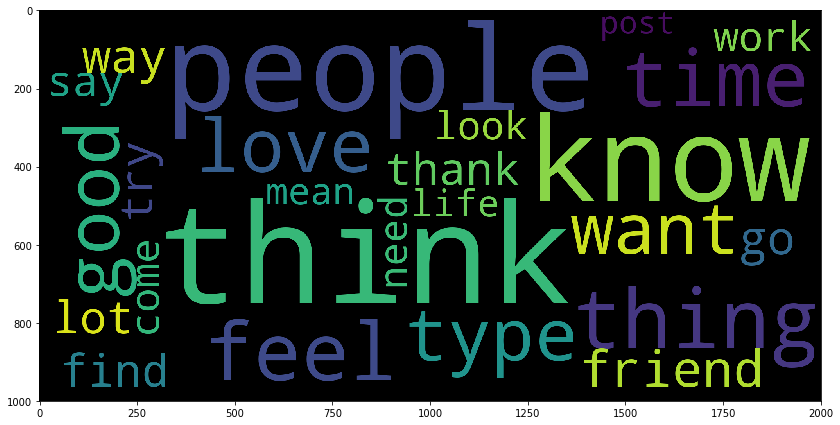

In [279]:
extrovert_full_text = ' '.join(df[df['type'].isin(['ENFJ', 'ENTJ', 'ENFP', 'ENFP','ESFJ', 'ESTJ', 'ESFP', 'ESFP'])]['posts2'])
plot_wordcloud(ISTP_full_text, 'black')